# Instantiating  the VGG16 convolutional base

In [26]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150,150,3))

In [27]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# Freezing all layers up to a specific one

In [28]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


# Training the model

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = 'path'
test_dir = 'path'
validation_dir = 'path'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2002 images belonging to 2 classes.
Found 1009 images belonging to 2 classes.


# Defining and training the densely connected classifier

In [30]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Fine-tuning the model

In [31]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 1e-5),
              metrics = ['acc'])

history = model.fit(train_generator,
          epochs = 50,
          validation_data = validation_generator,
          validation_steps = 50)

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - acc: 0.6560 - loss: 0.6057 - val_acc: 0.8800 - val_loss: 0.3265
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 34s 194ms/step - acc: 0.8358 - loss: 0.3748 - val_acc: 1.0000 - val_loss: 0.0791
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 26s 247ms/step - acc: 0.8576 - loss: 0.3113 - val_acc: 0.9010 - val_loss: 0.2514
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 354ms/step - acc: 0.8729 - loss: 0.2896 - val_acc: 1.0000 - val_loss: 0.0124
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 26s 244ms/step - acc: 0.8903 - loss: 0.2639 - val_acc: 0.9050 - val_loss: 0.2142
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 36s 342ms/step - acc: 0.8974 - loss: 0.2336 - val_acc: 1.0000 - val_loss: 0.0356
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 31s 243ms/step - acc: 0.9079 - loss: 0.2223 - val_acc: 0.9180 - val_loss: 0.1982
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - acc: 0.9250 - loss: 0.1955 - val_acc: 1.0000 - val_loss: 0.0680
Epoch 9/50
101/101 ━━━━━━━━━━━━━

# Plotting the results

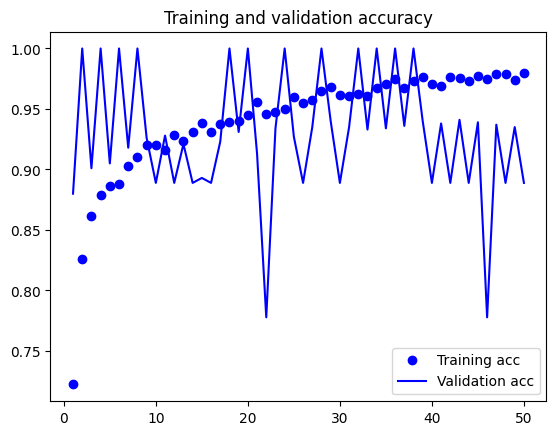

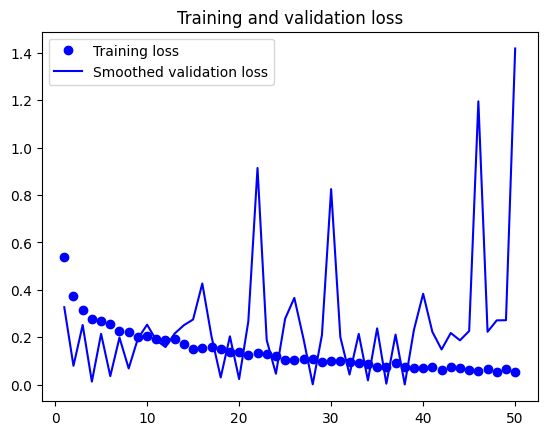

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Smoothing the plots

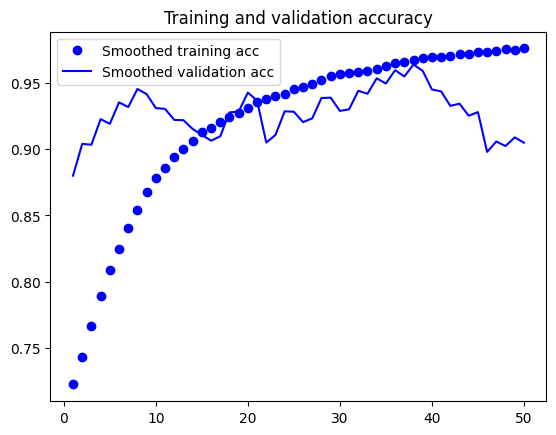

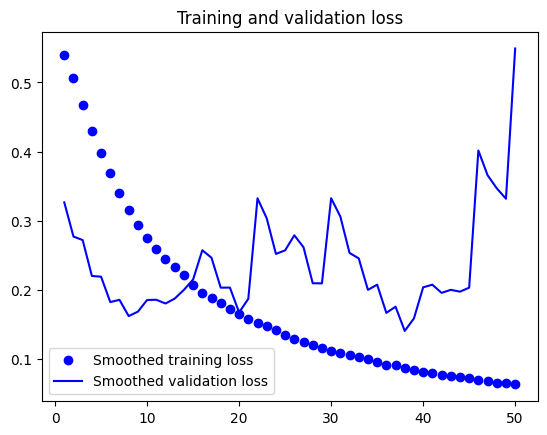

In [33]:
def smooth_curve(points, factor = 0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points


plt.plot(epochs,smooth_curve(acc), 'bo', label = 'Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label = 'Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label = 'Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label = 'Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# Evaluate the model on test data

In [34]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - acc: 0.9408 - loss: 0.1806
test acc: 0.9470000267028809
